# Estimativa da trajetória do CoM a partir de dados de MoCap já extraídos da base de dados MoVi

--> Bibliotecas necessárias para esta etapa.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

--> Abaixo, carregue o seu arquivo numpy contendo o array com os dados de posição 2D do MoCap

In [2]:
array = np.load('Sensor data.npy')

--> Armazene a posição das coordenadas das articulações necessárias para o cálculo do centro de massa dos segmentos corporais e do corpo todo.

In [3]:
# Storing the position coordinates (x,y) of the joints needed for the segments
# and whole body CoM calculation

# Foot 
left_ankle_joint = array[:,71, :]
right_ankle_joint = array[:,79,:]
left_foot_joint = array[:,78, :]
right_foot_joint = array[:,86,:]

# Leg 
left_knee_joint = array[:,75, :]
right_knee_joint = array[:,83,:]
left_ankle_joint = array[:,71, :]
right_ankle_joint = array[:,79,:]

# Thigh
left_hip_joint = array[:,73, :]
right_hip_joint = array[:,81,:]
left_knee_joint = array[:,75, :]
right_knee_joint = array[:,83,:]

# Trunk
left_shoulder_joint = array[:,76, :]
right_shoulder_joint = array[:,84,:]
left_hip_joint = array[:,73, :]
right_hip_joint = array[:,81,:]

# Hands
left_wrist_joint = array[:,77, :]
right_wrist_joint = array[:,85,:]
left_hand_joint = array[:,74, :]
right_hand_joint = array[:,82,:]

# Upper Arm
left_shoulder_joint = array[:,76, :]
right_shoulder_joint = array[:,84,:]
left_elbow_joint = array[:,72, :]
right_elbow_joint = array[:,80,:]

# Fore Arm
left_elbow_joint = array[:,72, :]
right_elbow_joint = array[:,80,:]
left_wrist_joint = array[:,77, :]
right_wrist_joint = array[:,85,:]

--> Calcular o CoM de cada segmento

In [4]:
# Calculate each segment´s CoM

# Left Foot CoM
xleftfootcom = (left_ankle_joint[:,0] + left_foot_joint[:,0])*0.5
yleftfootcom = (left_ankle_joint[:,1] + left_foot_joint[:,1])*0.5

# Right Foot CoM
xrightfootcom = (right_ankle_joint[:,0] + right_foot_joint[:,0])*0.5
yrightfootcom = (right_ankle_joint[:,1] + right_foot_joint[:,1])*0.5

# Left Leg CoM
xleftlegcom = left_knee_joint[:,0] + 0.433*(left_ankle_joint[:,0]-left_knee_joint[:,0])
yleftlegcom = left_knee_joint[:,1] - 0.433*(left_knee_joint[:,1]-left_ankle_joint[:,1])

# Right Leg CoM
xrightlegcom = right_knee_joint[:,0] + 0.433*(right_ankle_joint[:,0]-right_knee_joint[:,0])
yrightlegcom = right_knee_joint[:,1] - 0.433*(right_knee_joint[:,1]-right_ankle_joint[:,1])

# Left Thigh CoM
xleftthighcom = left_hip_joint[:,0] + 0.433*(left_knee_joint[:,0]-left_hip_joint[:,0])
yleftthighcom = left_hip_joint[:,1] - 0.433*(left_hip_joint[:,1]-left_knee_joint[:,1])

# Right Thigh CoM
xrightthighcom = right_hip_joint[:,0] + 0.433*(right_knee_joint[:,0]-right_hip_joint[:,0])
yrightthighcom = right_hip_joint[:,1] - 0.433*(right_hip_joint[:,1]-right_knee_joint[:,1])

# Trunk CoM
xtrunkcom = (left_shoulder_joint[:,0] + right_shoulder_joint[:,0])*0.5 - 0.66 * ((left_shoulder_joint[:,0] + right_shoulder_joint[:,0])*0.5 - (left_hip_joint[:,0] + right_hip_joint[:,0])*0.5)
ytrunkcom = (left_shoulder_joint[:,1] + right_shoulder_joint[:,1])*0.5 - 0.66 * ((left_shoulder_joint[:,1] + right_shoulder_joint[:,1])*0.5 - (left_hip_joint[:,1] + right_hip_joint[:,1])*0.5)

# Left hand CoM
xlefthandcom =  left_wrist_joint[:,0] + 0.506*(left_hand_joint[:,0] - left_wrist_joint[:,0])
ylefthandcom =  left_wrist_joint[:,1] - 0.506*(left_wrist_joint[:,1] - left_hand_joint[:,1])

# Right hand CoM
xrighthandcom =  right_wrist_joint[:,0] + 0.506*(right_hand_joint[:,0] - right_wrist_joint[:,0])
yrighthandcom =  right_wrist_joint[:,1] - 0.506*(right_wrist_joint[:,1] - right_hand_joint[:,1])

# Left Upper Arm CoM
xleftupperarm = left_shoulder_joint[:,0] + 0.436 * (left_elbow_joint[:,0] - left_shoulder_joint[:,0])
yleftupperarm = left_shoulder_joint[:,1] - 0.436 * (left_shoulder_joint[:,1] - left_elbow_joint[:,1])

# Right Upper Arm CoM
xrightupperarm = right_shoulder_joint[:,0] + 0.436 * (right_elbow_joint[:,0] - right_shoulder_joint[:,0])
yrightupperarm = right_shoulder_joint[:,1] - 0.436 * (right_shoulder_joint[:,1] - right_elbow_joint[:,1])

# Left Fore Arm CoM
xleftforearm = left_elbow_joint[:,0] + 0.430 * (left_wrist_joint[:,0] - left_elbow_joint[:,0])
yleftforearm = left_elbow_joint[:,1] - 0.430 * (left_elbow_joint[:,1] - left_wrist_joint[:,1])

# Right Fore Arm CoM
xrightforearm = right_elbow_joint[:,0] + 0.430 * (right_wrist_joint[:,0] - right_elbow_joint[:,0])
yrightforearm = right_elbow_joint[:,1] - 0.430 * (right_elbow_joint[:,1] - right_wrist_joint[:,1])

--> Calcular o Com do corpo todo

In [5]:
# Calculate the whole body CoM

body_com_x = 0.0145 * (xleftfootcom + xrightfootcom) + 0.0465 * (xleftlegcom + xrightlegcom) + 0.1 * (xleftthighcom + xrightthighcom) + 0.578 * xtrunkcom + 0.006 * (xlefthandcom + xrighthandcom) + 0.028 * (xleftupperarm + xrightupperarm) + 0.016 * (xleftforearm + xrightforearm)
body_com_y = 0.0145 * (yleftfootcom + yrightfootcom) + 0.0465 * (yleftlegcom + yrightlegcom) + 0.1 * (yleftthighcom + yrightthighcom) + 0.578 * ytrunkcom + 0.006 * (ylefthandcom + yrighthandcom) + 0.028 * (yleftupperarm + yrightupperarm) + 0.016 * (yleftforearm + yrightforearm)


## CoM do corpo todo para todos os frames do vídeo

--> Armazenar e apresentar os valores das coordenadas do CoM em um array 2d

In [6]:
# Build a 2-d array to insert the values obtained for the x and y coordinates of the whole body´s CoM
# in each frame

bodycoms = np.array([body_com_x, body_com_y])
bodycoms

array([[ 18.92913911,  18.93863617,  18.95076492, ...,  46.87412013,
         46.87776807,  46.87939416],
       [986.50871713, 986.51161817, 986.516038  , ..., 939.09564668,
        939.11753844, 939.13789529]])

--> Criar um tabela do tipo dataframe, em que as linhas representam as coordenadas do CoM e as colunas o número de frames, também chamados de sheets na tabela, iniciando do frame 0 do vídeo.

In [7]:
# Create the dataframe table (rows are the coordinates and columns are the frames/sheets starting from 0)

df = pd.DataFrame(bodycoms,
                 index=['X', 'Y'])
df

,0,1,2,3,4,5,6,7,8,9,...,17836,17837,17838,17839,17840,17841,17842,17843,17844,17845
X,18.929139,18.938636,18.950765,19.017671,19.000997,19.014016,19.018513,19.021733,19.002233,19.000525,...,46.877351,46.878374,46.873642,46.886444,46.896437,46.894255,46.896500,46.874120,46.877768,46.879394
Y,986.508717,986.511618,986.516038,986.494681,986.499087,986.506965,986.512959,986.521327,986.518595,986.501900,...,939.099427,939.088893,939.088053,939.086121,939.090073,939.087568,939.094325,939.095647,939.117538,939.137895


--> Inverta este dataframe para que a visualização fique melhor.

In [8]:
# Converting rows into columns

df_t = df.T
df_t

,X,Y
0,18.929139,986.508717
1,18.938636,986.511618
2,18.950765,986.516038
3,19.017671,986.494681
4,19.000997,986.499087
...,...,...
17841,46.894255,939.087568
17842,46.896500,939.094325
17843,46.874120,939.095647
17844,46.877768,939.117538


--> Plote o gráfico das coordenadas horizontal e vertical em relação ao número de frames, nos dois blocos seguintes.

Text(0.5, 0, 'Number of frames')

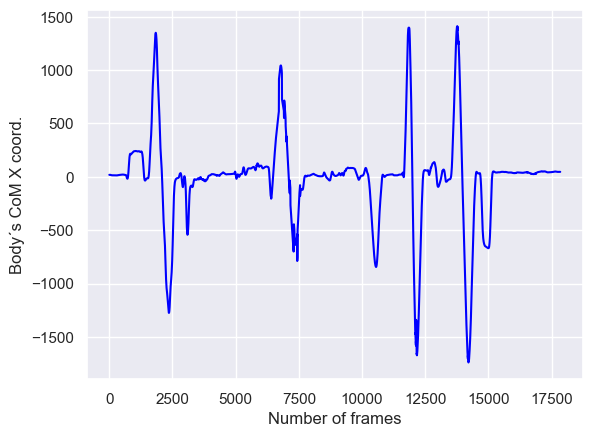

In [9]:
# Simpler way to see the X and Y body CoM coordinates trajectory

df_tX = df_t['X']
df_tY = df_t['Y']

# Plotting the X coord. of whole body´s CoM trajectory

df_tX.plot(color='blue', alpha=1.0, style='-');
plt.ylabel('Body´s CoM X coord.')
plt.xlabel('Number of frames')

Text(0.5, 0, 'Number of frames')

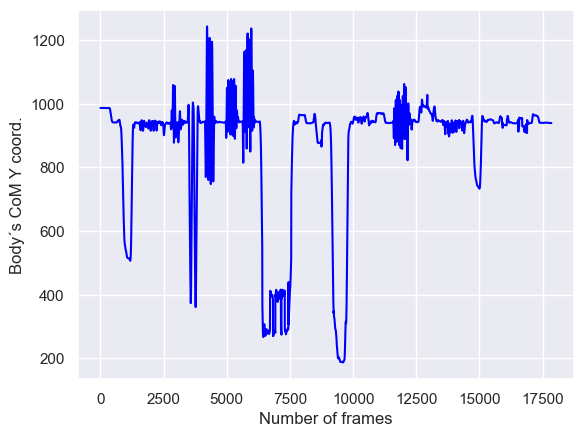

In [10]:
# Plotting the Y coord. of whole body´s CoM trajectory

df_tY.plot(color='blue', alpha=1.0, style='-');
plt.ylabel('Body´s CoM Y coord.')
plt.xlabel('Number of frames')

--> Salve agora os dados da trajetória do CoM do indivíduo em toda a extensão do vídeo.

In [11]:
np.save('Whole body CoM data', df_t)